<a href="https://colab.research.google.com/github/SoIllEconomist/ds4b/blob/master/python_ds4b/01_exploration/03_exploratory_data_analysis/00_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This chapter will show you how to use visualisation and transformation to explore your data in a systematic way, a task that statisticians call exploratory data analysis, or EDA for short. EDA is an iterative cycle. You:

1. Generate questions about your data.

1. Search for answers by visualising, transforming, and modelling your data.

1. Use what you learn to refine your questions and/or generate new questions.

EDA is not a formal process with a strict set of rules. More than anything, EDA is a state of mind. During the initial phases of EDA you should feel free to investigate every idea that occurs to you. Some of these ideas will pan out, and some will be dead ends. As your exploration continues, you will home in on a few particularly productive areas that you’ll eventually write up and communicate to others.

EDA is an important part of any data analysis, even if the questions are handed to you on a platter, because you always need to investigate the quality of your data. Data cleaning is just one application of EDA: you ask questions about whether your data meets your expectations or not. To do data cleaning, you’ll need to deploy all the tools of EDA: visualisation, transformation, and modelling.

## Prerequisites
In this chapter we’ll combine what you’ve learned about `pandas` and `seaborn` to interactively ask questions, answer them with data, and then ask new questions.



In [0]:
import pandas as pd
import seaborn as sns

## Questions
> There are no routine statistical questions, only questionable statistical routines. 
> 
> — Sir David Cox

> Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise.
> 
> — John Tukey

Your goal during EDA is to develop an understanding of your data. The easiest way to do this is to use questions as tools to guide your investigation. When you ask a question, the question focuses your attention on a specific part of your dataset and helps you decide which graphs, models, or transformations to make.

EDA is fundamentally a creative process. And like most creative processes, the key to asking quality questions is to generate a large quantity of questions. It is difficult to ask revealing questions at the start of your analysis because you do not know what insights are contained in your dataset. On the other hand, each new question that you ask will expose you to a new aspect of your data and increase your chance of making a discovery. You can quickly drill down into the most interesting parts of your data—and develop a set of thought-provoking questions—if you follow up each question with a new question based on what you find.

There is no rule about which questions you should ask to guide your research. However, two types of questions will always be useful for making discoveries within your data. You can loosely word these questions as:

1. What type of variation occurs within my variables?

1. What type of covariation occurs between my variables?

The rest of this chapter will look at these two questions. I’ll explain what variation and covariation are, and I’ll show you several ways to answer each question. To make the discussion easier, let’s define some terms:

- A **variable** is a quantity, quality, or property that you can measure.

- A **value** is the state of a variable when you measure it. The value of a variable may change from measurement to measurement.

- An **observation** is a set of measurements made under similar conditions (you usually make all of the measurements in an observation at the same time and on the same object). An observation will contain several values, each associated with a different variable. I’ll sometimes refer to an observation as a data point.

- **Tabular data** is a set of values, each associated with a variable and an observation. Tabular data is tidy if each value is placed in its own “cell”, each variable in its own column, and each observation in its own row.

So far, all of the data that you’ve seen has been tidy. In real-life, most data isn’t tidy, so we’ll come back to these ideas again in tidy data.

## Variation
**Variation** is the tendency of the values of a variable to change from measurement to measurement. You can see variation easily in real life; if you measure any continuous variable twice, you will get two different results. This is true even if you measure quantities that are constant, like the speed of light. Each of your measurements will include a small amount of error that varies from measurement to measurement. Categorical variables can also vary if you measure across different subjects (e.g. the eye colors of different people), or different times (e.g. the energy levels of an electron at different moments). Every variable has its own pattern of variation, which can reveal interesting information. The best way to understand that pattern is to visualise the distribution of the variable’s values.

## Visualising distributions
How you visualise the distribution of a variable will depend on whether the variable is categorical or continuous. A variable is **categorical** if it can only take one of a small set of values. In `pandas`, categorical variables are usually saved as `categoricals` or `string` objects. To examine the distribution of a categorical variable, use a bar chart:

In [0]:
diamonds = sns.load_dataset("diamonds")

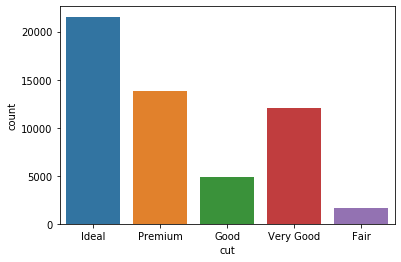

In [0]:
sns.countplot(x="cut", data=diamonds);

The height of the bars displays how many observations occurred with each x value. You can compute these values manually with:

In [0]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

A variable is **continuous** if it can take any of an infinite set of ordered values. Numbers and date-times are two examples of continuous variables. To examine the distribution of a continuous variable, use a histogram:

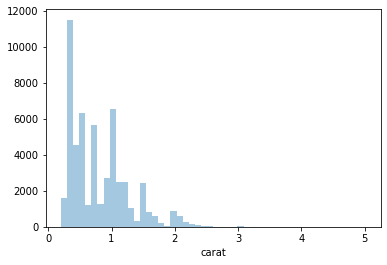

In [0]:
sns.distplot(diamonds['carat'], kde=False);

A histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin.

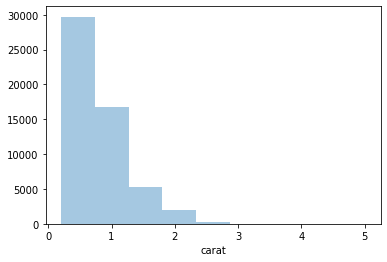

In [0]:
sns.distplot(diamonds['carat'],bins=9,kde=False);

A histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin. In the graph above, the tallest bar shows that almost 30,000 observations have a carat value between 0.25 and 0.75, which are the left and right edges of the bar.

You can set the width of the intervals in a histogram with the `bins` argument, which is measured in the units of the `x` variable. You should always explore a variety of `bins` when working with histograms, as different `bins` can reveal different patterns. For example, here is how the graph above looks when we zoom into just the diamonds with a size of less than three carats and choose a smaller binwidth.

In [0]:
smaller = diamonds.query("carat < 3")

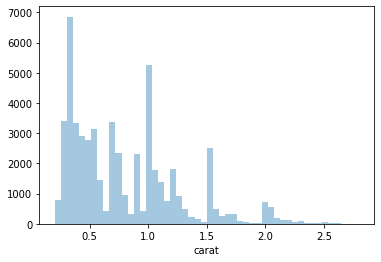

In [0]:
sns.distplot(smaller['carat'], kde=False);

Now that you can visualise variation, what should you look for in your plots? And what type of follow-up questions should you ask? I’ve put together a list below of the most useful types of information that you will find in your graphs, along with some follow-up questions for each type of information. The key to asking good follow-up questions will be to rely on your curiosity (What do you want to learn more about?) as well as your skepticism (How could this be misleading?).

### Typical values
In both bar charts and histograms, tall bars show the common values of a variable, and shorter bars show less-common values. Places that do not have bars reveal values that were not seen in your data. To turn this information into useful questions, look for anything unexpected:
- Which values are the most common? Why?
- Which values are rare? Why? Does that match your expectations?
- Can you see any unusual patterns? What might explain them?

As an example, the histogram below suggests several interesting questions:

- Why are there more diamonds at whole carats and common fractions of carats?
- Why are there more diamonds slightly to the right of each peak than there are slightly to the left of each peak?
- Why are there no diamonds bigger than 3 carats?


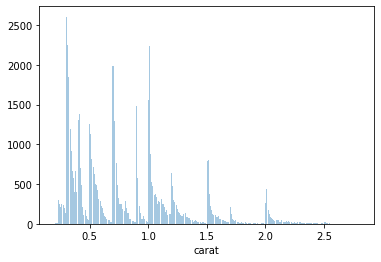

In [0]:
sns.distplot(smaller['carat'], bins=300, kde=False);

Clusters of similar values suggest that subgroups exist in your data. To understand the subgroups, ask:
-  are the observations within each cluster similar to each other?
- How are the observations in separate clusters different from each other?
- How can you explain or describe the clusters?
- Why might the appearance of clusters be misleading? 


In [0]:
!upzip old-faithful.zip

/bin/bash: upzip: command not found


In [0]:
!unzip /content/old-faithful.zip

Archive:  /content/old-faithful.zip
  inflating: faithful.csv            


In [0]:
faithful = pd.read_csv('faithful.csv')

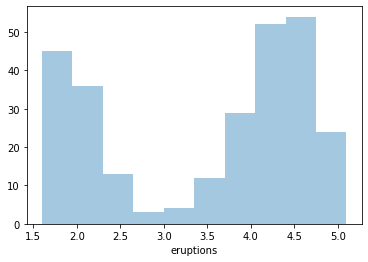

In [0]:
sns.distplot(faithful["eruptions"], bins=10, kde=False);

Many of the questions above will prompt you to explore a relationship between variables, for example, to see if the values of one variable can explain the behavior of another variable. We’ll get to that shortly.
### Unusual values
Outliers are observations that are unusual; data points that don’t seem to fit the pattern. Sometimes outliers are data entry errors; other times outliers suggest important new science. When you have a lot of data, outliers are sometimes difficult to see in a histogram. For example, take the distribution of the y variable from the diamonds dataset. The only evidence of outliers is the unusually wide limits on the x-axis.

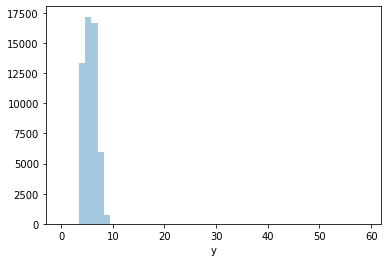

In [0]:
sns.distplot(diamonds["y"], kde=False);

There are so many observations in the common bins that the rare bins are so short that you can’t see them (although maybe if you stare intently at 0 you’ll spot something). To make it easy to see the unusual values, we need to zoom to small values of the y-axis with `set(ylim=(0,50))`

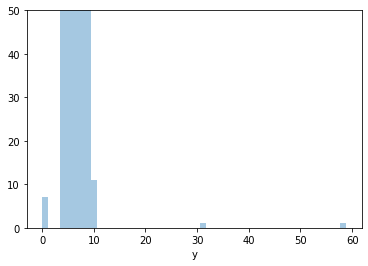

In [0]:
sns.distplot(diamonds["y"], kde=False).set(ylim=(0,50));

`set()` also has an `xlim()` argument for when you need to zoom into the x-axis.

This allows us to see that there are three unusual values: 0, ~30, and ~60. We pluck them out

In [0]:
unusual = diamonds.query("y<3 | y > 20")[["price","x","y","z"]].sort_values("y")

In [0]:
unusual

,price,x,y,z
11963,5139,0.00,0.0,0.00
15951,6381,0.00,0.0,0.00
24520,12800,0.00,0.0,0.00
26243,15686,0.00,0.0,0.00
27429,18034,0.00,0.0,0.00
49556,2130,0.00,0.0,0.00
49557,2130,0.00,0.0,0.00
49189,2075,5.15,31.8,5.12
24067,12210,8.09,58.9,8.06


The y variable measures one of the three dimensions of these diamonds, in mm. We know that diamonds can’t have a width of 0mm, so these values must be incorrect. We might also suspect that measurements of 32mm and 59mm are implausible: those diamonds are over an inch long, but don’t cost hundreds of thousands of dollars!

It’s good practice to repeat your analysis with and without the outliers. If they have minimal effect on the results, and you can’t figure out why they’re there, it’s reasonable to replace them with missing values, and move on. However, if they have a substantial effect on your results, you shouldn’t drop them without justification. You’ll need to figure out what caused them (e.g. a data entry error) and disclose that you removed them in your write-up.

### Exercises
1. Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

1. Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the bins and make sure you try a wide range of values.)

1. How many diamonds are 0.99 carat? How many are 1 carat? What do you think is the cause of the difference?

1. Compare and contrast `set()` when zooming in on a histogram. What happens if you leave bins unset? What happens if you try and zoom so only half a bar shows?

## Missing Values
If you’ve encountered unusual values in your dataset, and simply want to move on to the rest of your analysis, you have two options.

1. Drop the entire row with the strange values:

In [0]:
diamonds2 = diamonds[diamonds['y'].between(3, 20)]

I don’t recommend this option because just because one measurement is invalid, doesn’t mean all the measurements are. Additionally, if you have low quality data, by time that you’ve applied this approach to every variable you might find that you don’t have any data left!

2. Instead, I recommend replacing the unusual values with missing values. 

In [0]:
diamonds.loc[(diamonds["y"] < 3) | (diamonds["y"]> 20), 'y'] = np.nan

Other times you want to understand what makes observations with missing values different to observations with recorded values. For example, in flights, missing values in the `dep_time` variable indicate that the flight was cancelled. So you might want to compare the scheduled departure times for cancelled and non-cancelled times. You can do this by making a new variable with `isna()`.

In [0]:
flights = pd.read_csv("flights.csv")

In [0]:
flights = flights.assign(cancelled = flights['dep_time'].isna(),
               sched_hour = flights['sched_dep_time'] // 100,
               sched_min = flights['sched_dep_time'] % 100,
               )

In [0]:
flights['sched_dep_time'] = flights["sched_hour"] + flights["sched_min"] / 60

ValueError: ignored

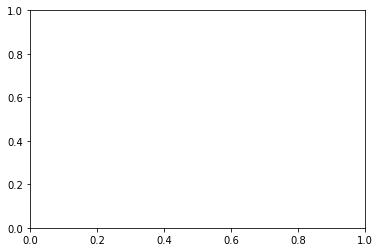

In [0]:
sns.kdeplot(x="sched_dept_time", data=flights)

## Covariation

## Patterns and models